In [231]:
import numpy as np
import matplotlib.pyplot as plt

# Scipy

In [246]:
from scipy import stats

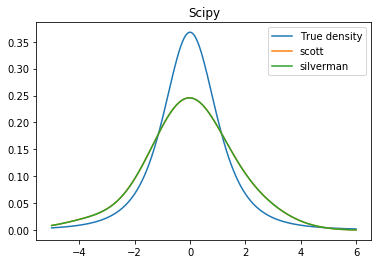

In [247]:
loc = 0
scale = 1
df = 3
true_density = stats.t(df = df, loc=loc, scale=scale)
np.random.seed(123)
dataset = np.random.standard_t(df = df, size=100)

x = np.linspace(-5, 6, num = 2**9)

plt.figure()
plt.title('Scipy')
plt.plot(x, true_density.pdf(x), label = 'True density')
    
for bw_method in ['scott', 'silverman']:
    density_estimate = gaussian_kde(dataset = dataset, bw_method = 0.5)
    plt.plot(x, density_estimate.evaluate(x), label = bw_method)
    
plt.legend(loc = 'best')
plt.show()

# Statsmodels

In [248]:
import statsmodels.api as sm

In [249]:
np.random.seed(123)
dataset = np.random.standard_t(df = df, size=100)
dens = sm.nonparametric.KDEUnivariate(dataset)

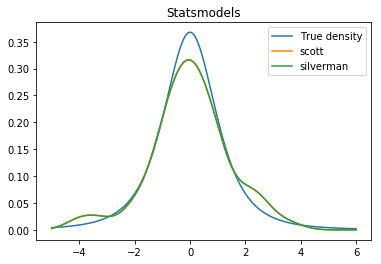

In [250]:
plt.figure()
plt.title('Statsmodels')
plt.plot(x, true_density.pdf(x), label = 'True density')

x = np.linspace(-5, 6, num = 2**9)

for bw_method in ['scott', 'silverman']:
    dens = sm.nonparametric.KDEUnivariate(dataset)
    dens.fit(bw=0.5, gridsize = 2**9)
    plt.plot(x, dens.evaluate(x), label = bw_method)
    
plt.legend(loc = 'best')
plt.show()

In [251]:
dataset[0:5]

array([-0.82309231,  1.65095097, -3.40470312, -0.27210745,  2.35086401])

# Jake

In [226]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / np.asarray(x).std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Scipy', 'Scikit-learn']

print("Package Versions:")
import sklearn; print ("  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print ("  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.19.1
  scipy: 1.0.0
  statsmodels: 0.8.0


In [227]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

[ 0.76405235 -0.59984279]
[0, 1.1, 2]
Statsmodels-U 0.0004792320032720454
Scipy 0.00038354299613274634


TypeError: list indices must be integers or slices, not tuple

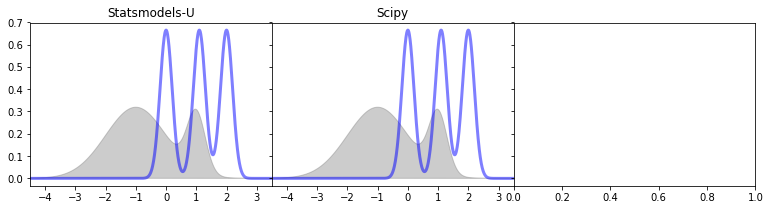

In [228]:
from scipy.stats.distributions import norm
import time

# The grid we'll use for plotting
x_grid = np.linspace(-4.5, 3.5, 1000)

# Draw points from a bimodal distribution in 1D
np.random.seed(0)
n = 3
x = np.concatenate([norm(-1, 1.).rvs(int(0.8*n)),
                    norm(1, 0.3).rvs(int(0.2*n))])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

print(x)
x = [0, 1.1, 2]
print(x)

# Plot the three kernel density estimates
fig, ax = plt.subplots(1, 3, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

for i in range(3):
    st = time.perf_counter()
    pdf = kde_funcs[i](x, x_grid, bandwidth=0.2)
    print(kde_funcnames[i], time.perf_counter() - st)
    
    
    
    ax[i].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
    ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax[i].set_title(kde_funcnames[i])
    ax[i].set_xlim(-4.5, 3.5)
    
from IPython.display import HTML
HTML("<font color='#666666'>Gray = True underlying distribution</font><br>"
     "<font color='6666ff'>Blue = KDE model distribution (500 pts)</font>")